## Logistic Regression with Binary Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 12,10

In [2]:
df = pd.read_csv('Churn.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Balancing Dataset - Optional

In [4]:
exited_df = df[df['Exited'] == 1]
not_exited_df = df[df['Exited'] == 0][:2037]
exited_df.shape, not_exited_df.shape 

df = exited_df
df = df.append(not_exited_df)

In [5]:
df.shape


(4074, 14)

In [6]:
df['Exited'].value_counts()

1    2037
0    2037
Name: Exited, dtype: int64

### Converting categorical data to numerical data

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

In [10]:
df['Geography2'] = le.fit_transform(df['Geography'])

In [11]:
df['Gender2'] = le.fit_transform(df['Gender'])

In [13]:
## Checking if variables are dependent on each other using correlation

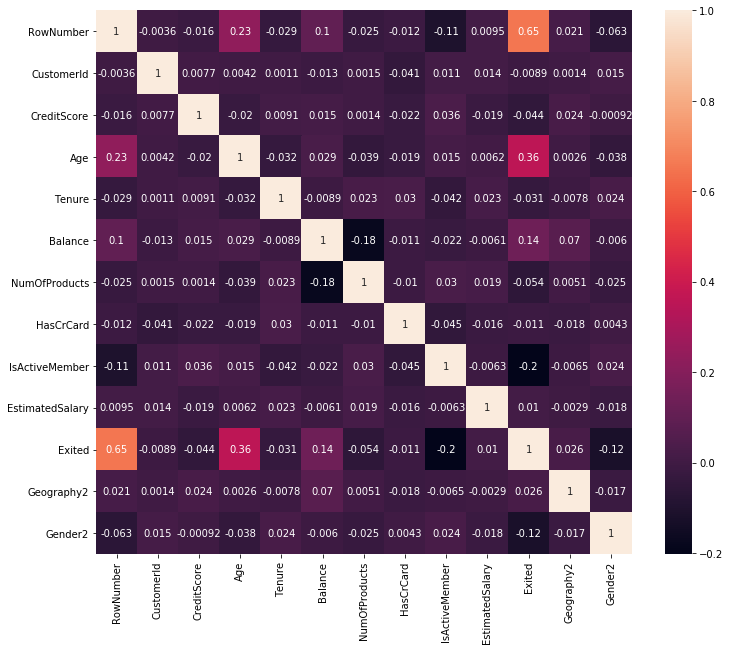

In [14]:
import seaborn as sb

sb.heatmap(df.corr(), annot=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4074 entries, 0 to 2589
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        4074 non-null   int64  
 1   CustomerId       4074 non-null   int64  
 2   Surname          4074 non-null   object 
 3   CreditScore      4074 non-null   int64  
 4   Geography        4074 non-null   object 
 5   Gender           4074 non-null   object 
 6   Age              4074 non-null   int64  
 7   Tenure           4074 non-null   int64  
 8   Balance          4074 non-null   float64
 9   NumOfProducts    4074 non-null   int64  
 10  HasCrCard        4074 non-null   int64  
 11  IsActiveMember   4074 non-null   int64  
 12  EstimatedSalary  4074 non-null   float64
 13  Exited           4074 non-null   int64  
 14  Geography2       4074 non-null   int32  
 15  Gender2          4074 non-null   int32  
dtypes: float64(2), int32(2), int64(9), object(3)
memory usage: 5

In [16]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography2,Gender2
count,4074.000000,4.074000e+03,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000
mean,3097.153166,1.569069e+07,649.691949,41.082474,5.022582,82650.136794,1.511537,0.704222,0.461708,100864.806065,0.500000,0.784487,0.501227
std,2767.355837,7.233451e+04,98.438873,10.517219,2.902877,61290.393744,0.672120,0.456448,0.498593,57524.655990,0.500061,0.801848,0.500060
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,1019.250000,1.562784e+07,581.250000,33.250000,3.000000,0.000000,1.000000,0.000000,0.000000,51924.020000,0.000000,0.000000,0.000000
50%,2037.500000,1.568999e+07,651.000000,40.000000,5.000000,103562.700000,1.000000,1.000000,0.000000,101048.740000,0.500000,1.000000,1.000000
75%,4870.750000,1.575329e+07,719.000000,48.000000,8.000000,129643.745000,2.000000,1.000000,1.000000,150210.875000,1.000000,1.000000,1.000000
max,9999.000000,1.581566e+07,850.000000,88.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199857.470000,1.000000,2.000000,1.000000


In [17]:
df.describe().columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography2', 'Gender2'],
      dtype='object')

### Considering only numerical values

In [27]:
X = df[['CreditScore', 'Age', 'Tenure',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary','Geography2']].values
Y = df[['Exited']].values

In [28]:
df[['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']].values

array([[6.1900000e+02, 4.2000000e+01, 2.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [5.0200000e+02, 4.2000000e+01, 8.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       [6.4500000e+02, 4.4000000e+01, 8.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.4975671e+05],
       ...,
       [5.6300000e+02, 3.3000000e+01, 8.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 6.8815050e+04],
       [7.4100000e+02, 3.2000000e+01, 5.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 6.4839230e+04],
       [7.7800000e+02, 4.4000000e+01, 8.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.4449494e+05]])

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [31]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((3055, 8), (1019, 8), (3055, 1), (1019, 1))

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
LogReg = LogisticRegression()

In [34]:
LogReg.fit(X_train, Y_train)

E:\Applications\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
LogReg.score(X_test, Y_test)

0.6575073601570167